# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования:**

- Выявить факторы, влияющие на ценообразование квартир.
- Определить рыночную стоимость объектов недвижимости.
- Установить параметры для создания автоматизированной системы отслеживания аномалий и мошеннической деятельности на рынке недвижимости.

**Ход исследования:**

Исходные данные прочитаем из файла `/datasets/real_estate_data.csv`. Для проведения исследования необходимо изучить и подготовить данные. Проверим данные на шумы, пропуски, выбросы, а также полноту и стпепень правдоподобия и устраним все обнаруженные проблемы. Далее произведем необходимы расчеты, полученные показатели помогут провести полноценный исследовательский анализ данных. На заключительном этапе зафиксируем полученные результы.

**Основные этапы исследования:**
1. Знакомство с данными и изучение общей информации.
2. Предобработка данных.
3. Расчеты и добавление результатов в таблицу.
4. Исследовательский анализ.
5. Составление общего вывода.

### Изучение общей информации из файла с данными

Ознакомимся с данными сервиса Яндекс.Недвижимость — архивом объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
# Прочитаем исходные данные и выведем на экран первые строки
pd.options.display.max_columns = 30
try:
    estate = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    estate = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Изучим общую информацию по полученным данным.

In [2]:
# Выведем общую информацию о датафрейме estate
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Описание данных**
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

В датафрейме всего 22 столбца и 23 699 строк. 

Имеются пропущенные значения в столбцах: `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` и `days_exposition`. Таким образом, в большинстве столбцов есть пропуски, нужно будет разобраться с возможными причинами появления и обработать их перед анализом данных.

Следует привести названия столбцов `cityCenters_nearest`, `parks_around3000` и `ponds_around3000` в соответсвтие с хорошим стилем. 

Отметим, что в ряде столбцов некорректный тип данных, изменением которого займемся чуть позже. Изменим тип данных в `first_day_exposition` на datetime, а в `is_apartment` на булев тип, вместо object. Также заменим вещественные значения на целочисленные в следующих столбцах: `last_price`, `floors_total`, `floor`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `ponds_around3000`.

Для столбцов с числовым типом данных посмотрим статистические характеристики, которые дают представление о распределении значений.

In [3]:
# Выведем статистические данные по столбцам с округлением значений до 2-х знаков после запятой
pd.options.display.float_format = '{:.2f}'.format
estate.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


Отметим, что в ряде столбцов присутствуют аномальные значения. 

- Минимальный показатель стоимости квартиры на момент снятия с публикации 12 190 рублей в `last_price`. Вероятно, пропустили несколько нулей, нужно будет проверить количество подобных значений.
- В столбце `rooms` минимальное значение комнат 0, такое возможно лишь в случае, если квартира является студией или апартаментами.
- Выстота потолков от 1 до 100 метров требует особого внимания для изучения данных столбца `ceiling_height`.
- Показатели 60 этажей в `floors_total` и минимальной жилой площадью со значением 2 м² в `living_area` кажутся неправдоподобными значениеми.
- Минимальная площадь кухни в `kitchen_area` 1,3 м² также подозрительно мала.
- Исходя из данных с информацией об удаленности от аэропорта, есть квартиры, которые расположены в нем, т.к. минимальное значение 0 м. Проверим сколько таких значений в `airports_nearest` и исправим их.

Для более детального ознакомления с данными построим общую гистограмму для всех числовых столбцов таблицы. 

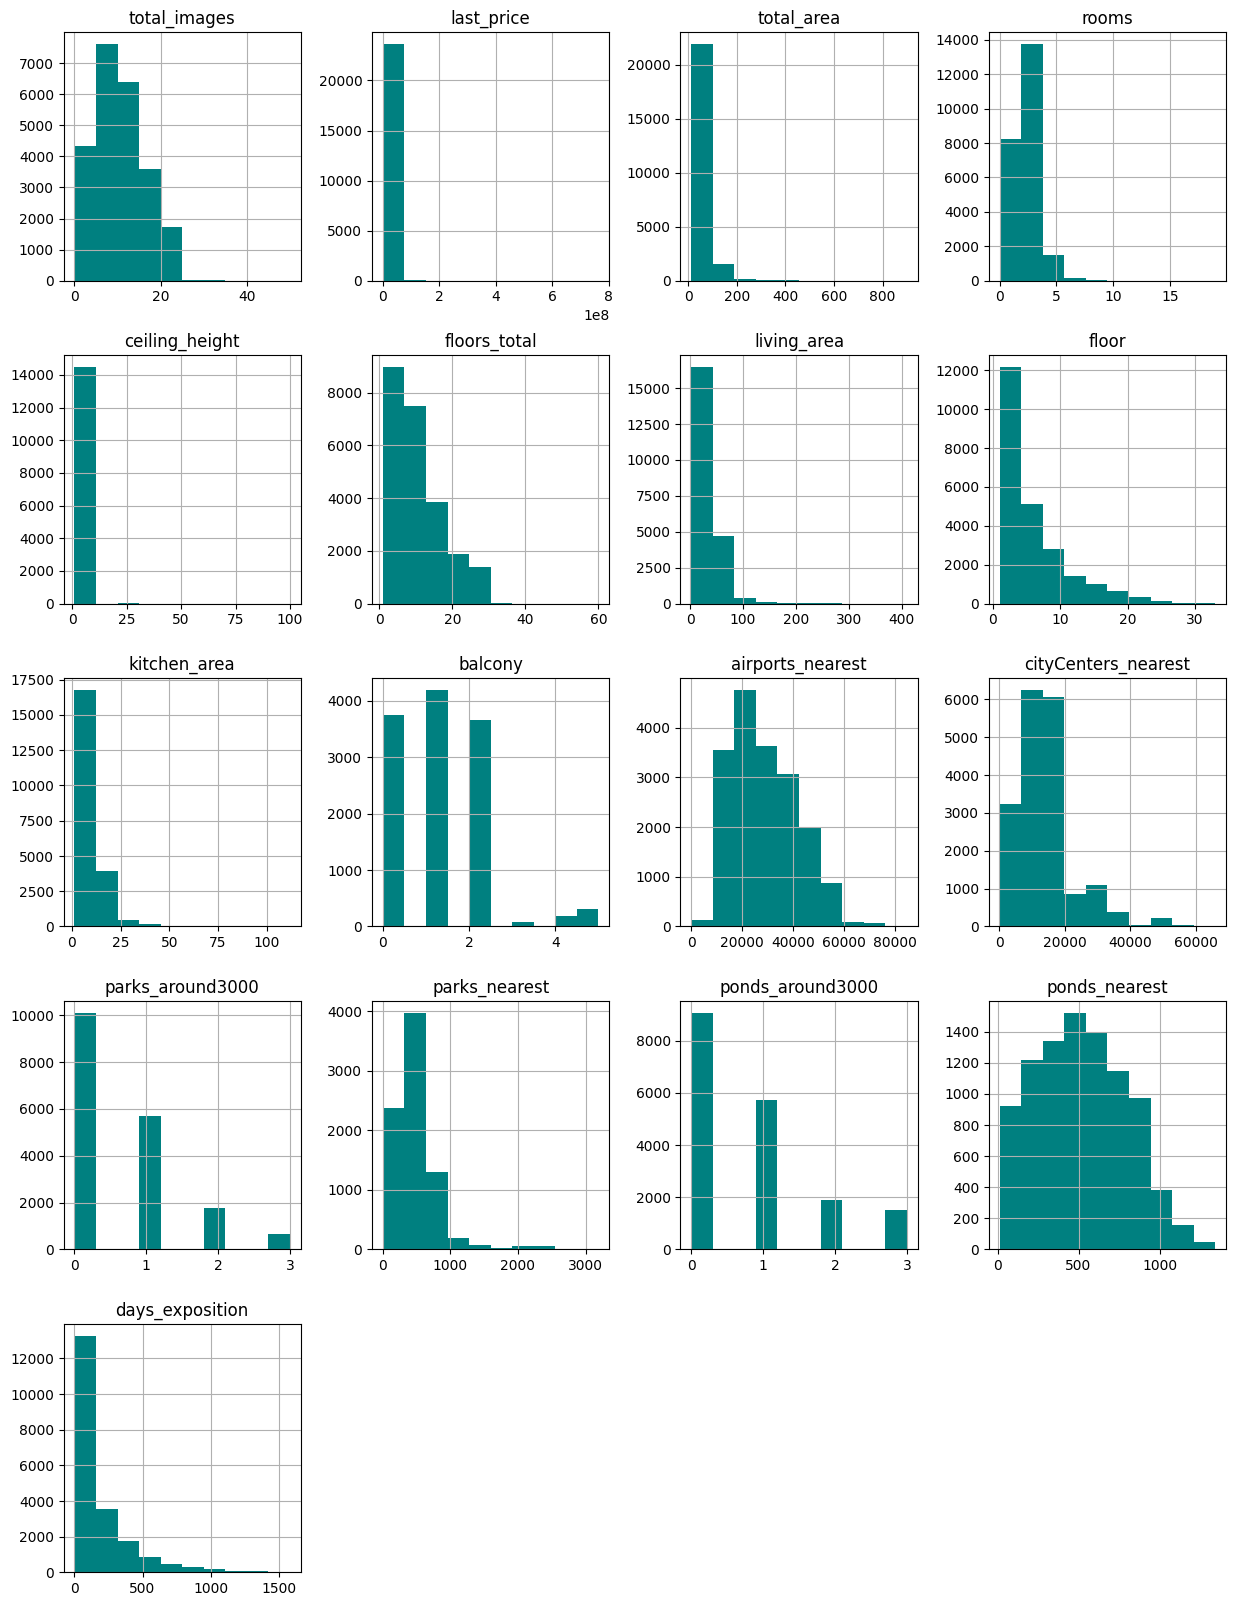

In [4]:
# Cтроим гистограммы по всем числовым столбцам
estate.hist(color='teal', figsize=(15, 20))
plt.show()

**Вывод**

Таким образом, изучили общую информацию о полученном датафрейме и построили гисторгаммы по всем числовым показателям. В ходе ознакомления с данными были обнаружены пропущенные значения, некорректный тип данных и наименования столбцов, а также аномальне значения. Обработкой данного ряда обнаруженных проблем займемся на следующем этапе предобработки данных.

### Предобработка данных

Для дальнейшей работы приведем наименования необходимых столбцов в соотвествие с хорошим стилем.

In [5]:
# Переименуем столбцы cityCenters_nearest, parks_around3000 и ponds_around3000
estate = estate.rename(columns={'cityCenters_nearest':'center_nearest', 'parks_around3000':'parks_around_3000', \
'ponds_around3000':'ponds_around_3000'})

Посмотрим на общее количество пропущенных значений в убывающем порядке.

In [6]:
# Выведем общее количество пропусков в порядке убывания
estate.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
center_nearest           5519
ponds_around_3000        5518
parks_around_3000        5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Наибольшее количество пропусков в `is_apartment`, `parks_nearest`, `ponds_nearest`, `balcony` и `ceiling_height`. В остальных колонках пропущенных значений на порядок меньше, либо их вовсе нет.

Для более корректной обработки отразим процент пропущенных значений для кажого показателя.

In [7]:
# Выведем % количества пропусков от общего числа показателей по каждому столбцу с округлением до 2-х знаков
pd.set_option('precision', 2)
pd.DataFrame(round(estate.isna().mean()*100, 2)).sort_values(by=0).style.background_gradient('coolwarm')

,0
total_images,0.00
open_plan,0.00
floor,0.00
rooms,0.00
studio,0.00
total_area,0.00
last_price,0.00
first_day_exposition,0.00
locality_name,0.21
floors_total,0.36


Видим, что в двух столбцах (`locality_name` и `floors_total`) пропуски составляют менее 1 %. Избавимся от данных с малочисленным количеством пропущенных значений.

In [8]:
# Удалим данные с незначительным количеством пропусков, обновим индексы
estate = estate.dropna(subset=['locality_name', 'floors_total']).reset_index(drop=True)

Заполним пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Также сюда можно отнести и пропуски с информацией о числе парков и водоемов в радиусе 3 км, вполне вероятно, что в данном диапазоне их может не быть. Произведем замену NaN в столбцах `balcony`, `parks_around_3000`, `ponds_around_3000` на 0. 

Ранее мы вяснили, что тип данных в этих столбцах представлен вещественными значениями, для удобства дальнейших расчетов и экономии памяти изменим тип на int.

In [9]:
# Для кажого столбца из списка change_columns произведем замену пропусков на 0 и поменяем тип данных
change_columns = ['balcony', 'parks_around_3000', 'ponds_around_3000']
estate[change_columns] = estate[change_columns].fillna(0).astype(int)

Проверим, какие уникальные значения встречаются в столбце с информацией о том, является ли объект недвижимости апартаментами.

In [10]:
# Вывод уникальных значений столбца is_apartment
estate['is_apartment'].unique()

array([nan, False, True], dtype=object)

Помимо пропусков встречаются только два значения: ложно и истинно, поэтому отсутсвующие значения в столбце `is_apartment` логично заменить на False. Для дальнейшего исследования также необходимо изменить тип данных на соотвествующий значениям булев тип.

In [11]:
# Произведем замену NaN на False в столбце is_apartment, а также изменим тип данных
estate['is_apartment'] = estate['is_apartment'].fillna('False').astype('bool')

В объявлениях редко указывают высоту потолков, поэтому в столбце `ceiling_height` порядка 39 % пропущенных значений. Произведем их замену на медианное значение, но прежде нужно обработать ранее обнаруженные аномальные значения. Напомним, что встречаются как заниженные значения (1 м), так и завышенные (100 м). Согласно строительным нормам и правилам, в многоквартирных домах в Санкт-Петербурге потолок должен быть не ниже 2,5 м.

Проверим, общее количество аномальных значений в `ceiling_height`. Ограничимся максимальной высотой потолка в 5 м.


In [12]:
# Выведем на экран количество потолоков с аномальными значениями
len(estate.query('ceiling_height < 2.5 | ceiling_height > 5 '))

109

Получили незнаительный показатель, всего 109 значений отклоняются от нормы. Для более корректного анализа произведем замену пропущенных и аномальных значений в `ceiling_height` на медиану, которая в отличие от среднего нивелирует значения выбросов.

In [13]:
# Произведем замену аномальных и пропущенных значений на медиану по столбцу ceiling_height
estate.loc[(estate['ceiling_height'] < 2.5)|(estate['ceiling_height'] > 5)|(estate['ceiling_height'].isna()),'ceiling_height'] = \
estate['ceiling_height'].median()

В 8 % объявлений отсутствуют данные с размером жилой площади, виной тому человеческий фактор, этот параметр могли пропустить по невнимательности, либо ограничиться указанием общей площади квартиры. Для заполнения пропусков в столбце `living_area` рассчитаем отношение жилой к общей площади квартиры. Но данный показатель в большинстве случаев будет меняться в зависимости от количества комнат, поэтому произведем расчеты для объектов с учетом количества комнат. Далее заполним NaN произведением полученного значения для кажого количества комнат и данных из столбца с общей площадью.

In [14]:
# Рассчитаем отношение жилой площади к ообщей, применив группировку квартир по количеству комнат
share_living_rooms = estate.groupby('rooms')['living_area'].median()/estate.groupby('rooms')['total_area'].median()
# Заполним пропуски произведением полученного отношения и общей площади квартиры
for rooms_count in estate['rooms'].unique():
    estate.loc[(estate['rooms'] == rooms_count)&(estate['living_area'].isna()), 'living_area'] = \
    estate.loc[(estate['rooms'] == rooms_count)&(estate['living_area'].isna()), 'total_area'] \
    * share_living_rooms[rooms_count]

Пропуски жилой площади заполнены, но необходимо убедиться, что сумма жилой и нежилой площадей не превышает значение общей. Проверим корректность заполнения пропущенных значений и выведем количество таких объектов, если они есть.

In [15]:
# Количество квартир, у которых сумма жилой и нежилой площадей превышает значение общей
len(estate.query('(living_area + kitchen_area) > total_area'))

74

Получилось, что у 74 объектов с учетом заолненных значений сумма жилой и нежилой площадей превышает значение общей, заменим значения в `living_area` разностью общей и нежилой площадей для полученных квартир для более корректной обработки пропусков.

In [16]:
# Заменим значения жилой площади разностью общей и нежилой площадей у тех объектов, где сумма жилой и нежилой больше общей площади
estate.loc[(estate['living_area'] + estate['kitchen_area']) > estate['total_area'], 'living_area'] = \
estate.loc[(estate['living_area'] + estate['kitchen_area']) > estate['total_area'], 'total_area'] - estate['kitchen_area']

Десятая часть продавцов не указала площадь кухни, могли посчитать этот параметр не столь важным, либо случайно пропусть информацию. Хоть и доля пропусков невелика, не будем их игнорировать и заполним NaN c помощью разности общей и жилой площадей объектов недвижимости.

In [17]:
# Заполним пропуски разностью общей и жилой площадей квартиры
estate['kitchen_area'].fillna(estate['total_area'] - estate['living_area'], inplace=True)

Для заполнения пропусков удаленности от центра города и ближайшего аэропорта нам понадобится информация из `locality_name`. Проверим, есть ли неявные дубликаты в данных. Для этого ознакомимся с уникальными значениями в столбце с названиями населённого пункта и узнаем их количество.

In [18]:
# Выведем все уникальные значения в locality_name
estate['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [19]:
# Количество значений каждого населенного пункта
estate['locality_name'].value_counts()

Санкт-Петербург           15651
посёлок Мурино              520
посёлок Шушары              439
Всеволожск                  398
Пушкин                      369
                          ...  
поселок Перово                1
поселок Севастьяново          1
поселок Гладкое               1
деревня Терпилицы             1
деревня Нижние Осельки        1
Name: locality_name, Length: 364, dtype: int64

In [20]:
# Общее число всех уникальных значений в locality_name
uniqe_name = estate['locality_name'].unique().shape[0]
print(f"Количество уникальных занчений в locality_name: {uniqe_name}.")

Количество уникальных занчений в locality_name: 364.


Изучив уникальные значения, перейдем к обработке неявных дубликатов. В первую очередь произведем замену буквы "ё" на "е". Далее приведем названия всех поселков городского типа к одному виду и проверим, изменилось ли количество уникальных значений в `locality_name`.

In [21]:
# Заменим все "ё" на "е"  и приведем названия пгт к одному типу и выведем количество неявных дубликатов
estate['locality_name'] = estate['locality_name'].str.replace('ё', 'е')\
.str.replace('городской поселок', 'поселок городского типа') \
.str.replace('поселок городского типа', 'поселок') 
# Выведем количество неявных дубликатов
uniqe_name_new = estate['locality_name'].unique().shape[0]
print(f"Количество уникальных занчений в locality_name уменьшилось на {uniqe_name - uniqe_name_new}.")

Количество уникальных занчений в locality_name уменьшилось на 42.


Удалось избавиться от неявных дубликатов, заодно проверим даннные и на наличие явных дубликатов.

In [22]:
estate.duplicated().sum()
print(f'Общее количество строк дубликатов: {estate.duplicated().sum()}.')

Общее количество строк дубликатов: 0.


С дубликатами разобрались, возвращаемся к пропускам в `airports_nearest` и `center_nearest`. 23 % процента объявлений остались без информации о расстоянии до ближашего аэропорта и центра города. Причиной пропусков является технологический фактор, так как эта информация получена автоматически на основе картографических данных. Возможную часть пропусков в `airports_nearest` и `center_nearest` заполним медианными значениями расстояния с помощью группировки по названию населенного пункта, остальную часть заполним общей медианой по всем значениям столбца.

In [23]:
# В цикле произведем замену всех пропусков для каждого столбца из списка. 
# Cперва заменяем средним с учетом группировки по названию нас.пункта, далее заполняем NaN общим медианным значением
nearest_columns = ['airports_nearest', 'center_nearest']
for col in nearest_columns:
    estate[col].fillna(estate.groupby('locality_name')[col].transform('median'), inplace=True)
    if estate[col].isna().sum() > 0:
        estate[col].fillna(estate[col].median(), inplace=True)

В случаях, когда логичную замену пропускам предложить невозможно, оставим эти значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать. Таким образом, не будем обрабатывать NaN в столбце `days_exposition` с количеством дней размещения объявлений (с момента публикации до снятия). Данные пропуски могли вознить по различным технологическим причинам, например, при выгрузке данных, либо же объявления были созданы, но не были опубликованы. Сложно предугадать данный показатель, диапазон значений от 1-го дня до 4-х с лишним лет, заменить значение медианой в 95 дней или 0? Чтобы не гадать и не искажать данные, оставим все как есть.

Данные о расстоянии до ближашйего парка или водоема не являются критически значимыми, поэтому их часто не указывают в объявлении. Объем пропущенных значений в столбцах `parks_nearest` и `ponds_nearest` более 60 %, и логичной замены им также нет, избавление от такого количества данных может сильно исказаить результат исследования, поэтому оставим пропуски без изменений.

Обработка пропусков завершена, возвращаемся к изменению некорректного типа данных, произведем замену значений типа object на datetime в `first_day_exposition`. Дата публикации должна иметь тип даты и времени, а не текстовые или смешанные числовые и нечисловые значения.

In [24]:
# Приведем дату публикации к типу даты
estate['first_day_exposition'] = pd.to_datetime(estate['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Также заменим вещественные значения на целочисленные в следующих столбцах: `last_price`, `floors_total`, `floor`, `airports_nearest`, `center_nearest`. Количество этажей не может быть дробным числом, а в остальных столбцах осуществим замену для удобства расчетов и экономии памяти. 

In [25]:
# Изменим тип данных с float на int для кажого столбца из списка
int_columns = ['last_price', 'floors_total', 'floor', 'airports_nearest', 'center_nearest']
estate[int_columns] = estate[int_columns].astype(int)

На этом этап изменения типов данных окончен, возвращаемся к устранению редких и выбивающихся значений. На этапе знакомства с данными, мы обратили внимание, что минимальный показатель стоимости квартиры на момент снятия с публикации 12 190 рублей. Вероятно, пропустили несколько нулей, нужно будет проверить количество подобных значений.

In [26]:
# Выведем значения столбца last_price в порядке возрастания
estate['last_price'].sort_values()

8750         12190
17359       430000
14825       430000
16185       440000
9535        450000
           ...    
15565    300000000
1431     330000000
14621    401300000
19431    420000000
12897    763000000
Name: last_price, Length: 23565, dtype: int32

Видим, что других аномально низких значений нет. Посмотрим информацию по данному объявлению и заменим значение на более реалистичное.

In [27]:
# Выведем строку с минимальным значением в last_price
estate.loc[8750]

total_images                              7
last_price                            12190
total_area                           109.00
first_day_exposition    2019-03-20 00:00:00
rooms                                     2
ceiling_height                         2.75
floors_total                             25
living_area                           32.00
floor                                    25
is_apartment                           True
studio                                False
open_plan                             False
kitchen_area                          40.50
balcony                                   0
locality_name               Санкт-Петербург
airports_nearest                      36421
center_nearest                         9176
parks_around_3000                         1
parks_nearest                        805.00
ponds_around_3000                         0
ponds_nearest                           NaN
days_exposition                        8.00
Name: 8750, dtype: object

Апартаменты в Санкт-Петербурге общей площадью в 109 м² не могут стоить 12 190 рублей, нули либо случайно пропустиили, либо указали стоимость в тысячах рублей. Исправим данный недочет.

In [28]:
# Заменим аномальное значение
estate.loc[8750, 'last_price'] = 12190000

В столбце `rooms` минимальное значение комнат 0, проверим количество объявлений без комнат и рассчитаем примерную общую площадь таких квартир.

In [29]:
# Найдем количество объектов без комнат и примерную площадь таких квартир
null_room = estate.query('rooms == 0')
print(f"Общее количество объектов без комнат: {len(null_room)}.")
print(f"Средняя площадь объектов без комнат: {round(null_room['total_area'].median(), 2)} м².")

Общее количество объектов без комнат: 194.
Средняя площадь объектов без комнат: 26.08 м².


Учитвая среднюю площадь объектов, нулевые значения уже не кажутся аномальнми. Выясним, не являются ли данные объекты недвижимости квартирой со свободной планировкой, студией или апартаментами.

In [30]:
# Найдем количество объектов без комнат, являющихся студией, апартаментами или квартирой со свободной планировкой
len(null_room.query('is_apartment | open_plan | studio'))

194

Таким образом, все объекты без комнат являются студией, апартаментами или квартирой со свободной планировкой с небольшой общей площадью. Гипотеза о наличии выбросов в столбце `rooms` не подтвердилась.

Ранее нас насторожил максимальный показатель 60 этажей в `floors_total` с общим количеством этажей в доме. Построим диаграмму, размаха чтобы лучше посмотреть на выбросы и аномалии значений данного столбца.

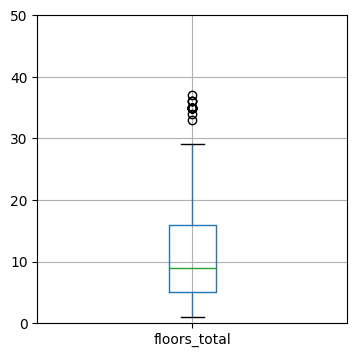

In [31]:
# Отображение диаграммы ящик с усами по бщему количеству этажей в доме
estate.boxplot(column='floors_total', figsize=(4,4))
plt.ylim(0, 50)
plt.show()

Исходя из диаграммы размаха видим, что есть небольшое число аномально высоких значений, к ним относятся объекты, у которых количиство этажей в доме превышает 30. Прежде чем заняться обработкой таких отклонений, нужно убедиться, стоит ли отнести их к выбросам. В самом высоком жилом небоскребе культурной столицы 35 этажей. Узнаем количиство выделяющихся значений по такому параметру.

In [32]:
max_floor = estate.query('floors_total > 35')
print(f"Количество объектов в зданиях, где общее число этажей более 35: {len(max_floor)} квартир." )

Количество объектов в зданиях, где общее число этажей более 35: 6 квартир.


В самом высоком бизнес-центре Санк-Петербурга 87 этажей. Проверим, не являются ли объекты с общим количеством этажей более 35 апартаментами.

In [33]:
print(f"Количество апартаментов в зданиях, где общее число этажей более 35: \
{len(max_floor.query('is_apartment'))} квартир.")

Количество апартаментов в зданиях, где общее число этажей более 35: 6 квартир.


Все объекты в небоскребах являются апартаментами, следовательно, гипотеза об аномальных показателях в `floors_total` также опровергнута.

Минимальный показатель жилой площади 2 м² в `living_area`кажется неправдоподобными значениеми. Микроапартаменты общей площадью 10 м² будут нижней границей значений. Найдем количество показателей ниже нормы.

In [34]:
# Количество объектов с жилой площадью менее 10 м²
len(estate.query('living_area < 10'))

39

Итого порядка 40 аномальных значений, в силу малочисленности можем избавиться от данных, но прежде проверим среднюю общую площадь таких квартир. Возможно, удастся избежать удаления данных.

In [35]:
# Найдем среднюю общую площадь объектов с жилой площадью менее 10 м²
estate.query('living_area < 10')['total_area'].median()

33.0

Общая площадь 33 м² является вполне реальной, поэтому произведем замену аномальных значений. 

Для заполнения пропусков в столбце `living_area` мы рассчитывали медианные значения отношения жилой к общей площади квартиры. Произведем замену аномально низких значений с использованием найденного сотношения *share_living_rooms* и данных из столбца с общей площадью квартиры и проверим, останутся ли еще отклоняющиеся значения.

In [36]:
# Произведем замену аномальных значений с учетом соотношения общей площади к жилой - share_living_rooms для однокомнатных квартир
estate.loc[estate['living_area'] < 10, 'living_area'] = estate['total_area'] * share_living_rooms[1]
print(f"Количество аномальных значений после замены: {len(estate.query('living_area < 10'))} квартир.")

Количество аномальных значений после замены: 13 квартир.


Очистим данные от оставшихся 13 выбросов.

In [37]:
# Удалим строки с аномальными данными
estate.drop(index=estate.query('living_area < 10').index, inplace=True)

При обзоре данных мы обратили внимание на минимальную площадь кухни 1,3 м². Проверим выбивающиеся значения в столбце `kitchen_area`, построим диаграмму размаха и выведем статистические показатели.

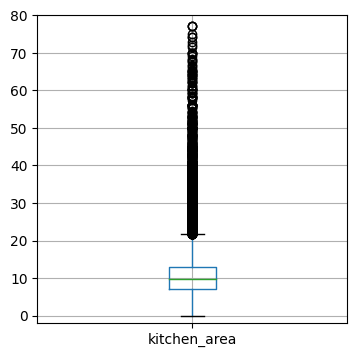

In [38]:
# Отображение диаграммы ящик с усами по kitchen_area
estate.boxplot(column='kitchen_area', figsize=(4,4))
plt.ylim(-2, 80)
plt.show()

In [39]:
# Выведем статистические показатели 
estate['kitchen_area'].describe()

count   23552.00
mean       11.75
std         8.35
min         0.00
25%         7.20
50%         9.80
75%        13.00
max       256.50
Name: kitchen_area, dtype: float64

При анализе диаграммы наблюбдаем большое количество значениий, которые могут быть завышены. Но учитывая данные общей площади объектов, не будем относить отклонения к выбросам. К тому же кухонь может быть несколько, так что значения вполне реальны.  

Минимальная площадь кухни, согласно нормативам — 5 м². Найдем долю значений, отклоняющихся от нормы.

In [40]:
# Рассчитаем % заниженных показателей
round(len(estate.query('kitchen_area < 5')) / len(estate) * 100, 2)

0.64

Менее 1 % значений ниже нормативных, произведем замену аномально низких показателей на минимальные по нормативу.

In [41]:
# Заменим значения ниже нормы минимальными нормативными
estate.loc[estate['kitchen_area'] < 5, 'kitchen_area'] = 5

Исходя из данных с информацией об удаленности от аэропорта, есть квартиры, которые расположены в нем, т.к. минимальное значение 0 м. Проверим сколько таких значений в `airports_nearest`. 

In [42]:
# Рассчитаем количество объявлений, где расстояние до аэропарта менее 1 км.
len(estate.query('airports_nearest < 1000'))

1

Всего в одном объявлении указано некорректное значение. Ознакомимся с другими характеристиками даннного объявления, возможно, получится заменить выброс медианным значением по названию населенного пункта.

In [43]:
# Вывод строки с аномальным значением 
estate.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
20968,0,7000000,34.70,2018-09-23,1,2.70,9,19.80,3,True,False,False,6.00,2,Санкт-Петербург,0,22801,0,NaN,0,NaN,60.00


Выяснилось, что квартира находится не на территории аэропорта, а в черте города, поэтому произведем замену аномального значения на медианное значение для Санкт-Петербурга.

In [44]:
# Заменим аномальный показатель на медиану по Санкт-Петербургу
estate.loc[20968, 'airports_nearest'] = estate[estate['locality_name'] == 'Санкт-Петербург']['airports_nearest'].median()

**Вывод**

Таким образом, этап предобработки данных завершен. Пропущенные значения найдены, изучены, по возможности заполнены и обработаны, и также указаны причины, которые могли привести к пропускам в данных. В ходе исследования рассмотрели типы данных каждого столбца и выявили такие, где потребовалась замена. Так, у части показателей был некорректный тип, к примеру, в `first_day_exposition` и `is_apartment`, в других изменили тип данных для удобства расчетов и экономии памяти. Также на этапе предобработки были выявлены и обработаны неявные дубликаты и аномальные значения. В случаях, где природа аномалии понятна и данные действительно искажены, восстановили корректные показатели, а в противных случаях удалили редкие и выбивающиеся значения.

### Расчеты и добавление результатов в таблицу 

Произведем расчет цены одного квадратного метра и добавим значения в столбец `meter_price`. Для удобства дальнейших расчетов приведем значения к целочисленному типу.

In [45]:
# Добавляем новый столбец с ценами за 1 м², приведенными к типу целых чисел
estate['meter_price'] = (estate['last_price'] / estate['total_area']).astype('int')

Добавим в таблицу столбец `weekday_exposition`, с указанием дня недели публикации объявления. Понедельник - день под номером 0, а воскресенье - шестой день.

In [46]:
# Добавляем новый столбец с днями недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
estate['weekday_exposition'] = estate['first_day_exposition'].dt.weekday

Дополним данные столбцом `month_exposition`, где отразим месяц публикации объявления. 

In [47]:
# Добавляем новый столбец с месяцом публикации объявления (1 — январь, 12 — декабрь)
estate['month_exposition'] = estate['first_day_exposition'].dt.month

Аналогично добавляем в таблицу столбец `year_exposition`, с указанием года публикации объявления. 

In [48]:
# Добавляем новый столбец с годом публикации объявления 
estate['year_exposition'] = estate['first_day_exposition'].dt.year

В столбце `type_floor` укажем, яляется ли этаж первым или последним, остальным этажам будет соответсвовать значение «другой». Для категоризации этажей напишем функцию, которая для каждой строки таблицы вернет соответствующее значение.

In [49]:
# Функция категоризации этажей по номеру этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
# Добавляем новый столбец с категорией этажа
estate['type_floor'] = estate.apply(floor_group, axis=1)

Также дополним таблицу столбцом `center_nearest_km` с расстоянием до центра города в километрах. Переведем исходные данные из метров в километры и округлим до целых значений.

In [50]:
# Добавляем новый столбец с расстоянием до центра города в км, окуруглим значения и приведем к типу целых чисел
estate['center_nearest_km'] = round(estate['center_nearest'] / 1000, 0).astype(int)

Посмотрим на первые строки обновленной таблицы, чтобы взглянуть на новые столбцы.

In [51]:
estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,center_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,weekday_exposition,month_exposition,year_exposition,type_floor,center_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.00,16028,1,482.00,2,755.00,NaN,120370,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,поселок Шушары,12817.00,18603,0,NaN,0,NaN,81.00,82920,1,12,2018,первый,19
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.00,13933,1,90.00,2,574.00,558.00,92785,3,8,2015,другой,14
3,0,64900000,159.00,2015-07-24,3,2.65,14,98.28,9,True,False,False,60.72,0,Санкт-Петербург,28098.00,6800,2,84.00,3,234.00,424.00,408176,4,7,2015,другой,7
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.00,8098,2,112.00,1,48.00,121.00,100000,1,6,2018,другой,8


**Вывод**

На этапе расчетов добавили в таблицу 6 новых столбцов со следующими параметрами:
- цена одного квадратного метра в `meter_price`; 
- день недели, месяц и год публикации объявления в `weekday_exposition`, `month_exposition`, `year_exposition`;
- тип этажа квартиры в `type_floor`; 
- расстояние до центра города в километрах в `center_nearest_km`.

Данные расчеты и полученные показатели помогут провести полноценный исследовательский анализ данных.

### Исследовательский анализ данных

Начнем с исследования общей площади объектов недвижимости. Посмотрим на распределение значений и статистические характеристики столбца `total_area`.

In [52]:
# Выведем статистические показатели общей площади
estate['total_area'].describe()

count   23552.00
mean       60.35
std        35.65
min        12.00
25%        40.00
50%        52.00
75%        69.70
max       900.00
Name: total_area, dtype: float64

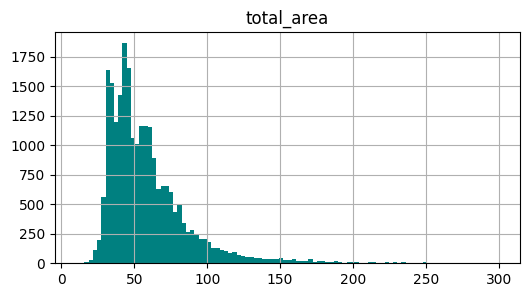

In [53]:
# Строим гистограмму по общей площади квартир
estate.hist('total_area', color='teal', range=(10, 300), bins=100, figsize = (6, 3))
plt.show()

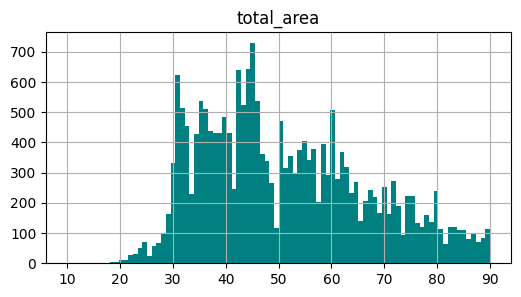

In [54]:
# Подробнее изучим пиковые распределения значений
estate.hist('total_area', color='teal', range=(10, 90), bins=90, figsize = (6, 3))
plt.show()

Медианное значение общей площади объектов 52 м². На гистограмме наблюдаем нормальное распределение, больше всего объявлений с площадью квартир от 30 до 50 м². Объекты, общая площадь которых более 100 м² встречаются довольно редко.

Исследуем распределение значений и статистические характеристики жилой площади в `living_area`.

In [55]:
# Выведем статистические показатели жилой площади
estate['living_area'].describe()

count   23552.00
mean       34.65
std        22.76
min        10.00
25%        18.75
50%        30.00
75%        42.30
max       427.55
Name: living_area, dtype: float64

Медианный показатель жилой площади объектов 30 м².

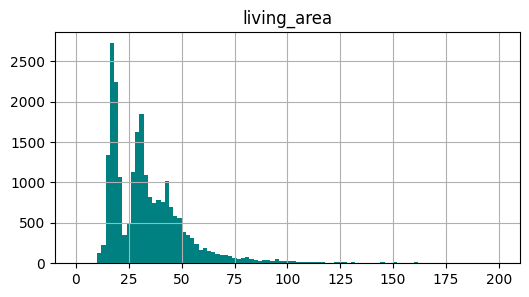

In [56]:
# Строим гистограмму по жилой площади квартир
estate.hist('living_area', color='teal', range=(0, 200), bins=100, figsize = (6, 3))
plt.show()

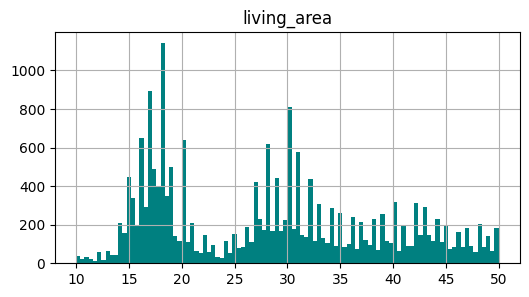

In [57]:
# Подробнее изучим пиковые распределения значений
estate.hist('living_area', color='teal', range=(10, 50), bins=100, figsize = (6, 3))
plt.show()

Общий тренд распределения значений похож на распределение Пуассона, в котором выделяются 3 пика, в диапозоне от 18 до 40 м².

Выведем статистические данные по площади кухни и построим гистограмму столбца `kitchen_area`.

In [58]:
# Выведем статистические показатели площади кухни
estate['kitchen_area'].describe()

count   23552.00
mean       11.76
std         8.34
min         5.00
25%         7.20
50%         9.80
75%        13.00
max       256.50
Name: kitchen_area, dtype: float64

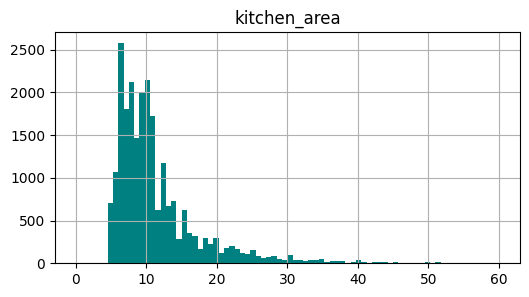

In [59]:
# Строим гистограмму по площади кухни
estate.hist('kitchen_area', color='teal', range=(0, 60), bins=80, figsize = (6, 3))
plt.show()

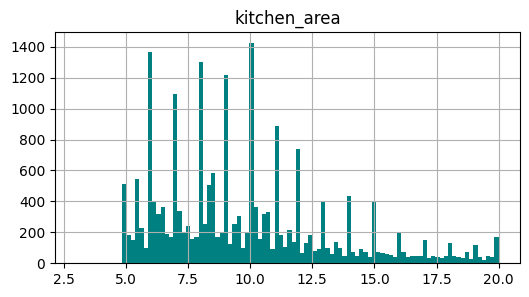

In [60]:
# Рассмотрим пиковые значения площади кухни
estate.hist('kitchen_area', color='teal', range=(3, 20), bins=100, figsize = (6, 3))
plt.show()

Медианный показатель площади кухни около 10 м². Распределение значений на гистограмме также соответствует распределению Пуассона. Пиковые значения площи кухни в диапозоне от 6 до 12 м². Имеются редкие объекты, площадь кухни которых превшает 30 м².

Далее рассмотрим распределение значений в столбце с ценой объекта недвижимости на момент снятия с публикации. 

In [61]:
# Выведем статистические показатели цены на момент снятия с публикации
estate['last_price'].describe()

count       23552.00
mean      6543143.62
std      10913370.37
min        430000.00
25%       3411750.00
50%       4650000.00
75%       6799000.00
max     763000000.00
Name: last_price, dtype: float64

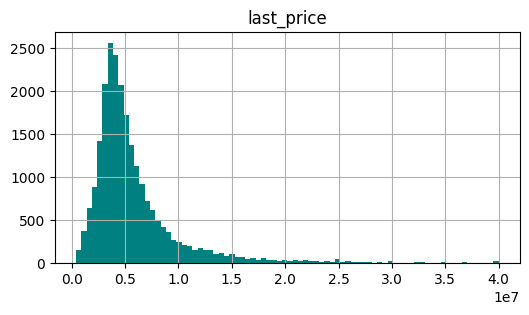

In [62]:
# Строим гистограмму по цене
estate.hist('last_price', color='teal', range=(400000, 40000000), bins=80, figsize = (6, 3))
plt.show()

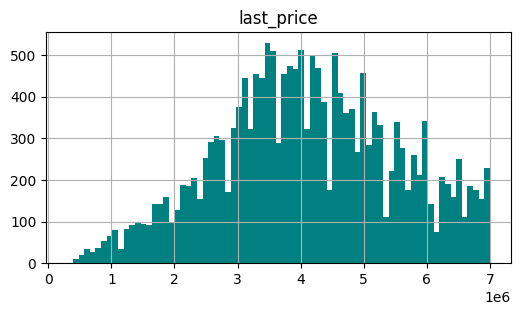

In [63]:
# Рассмотрим пиковые значения стоимости
estate.hist('last_price', color='teal', range=(300000, 7000000), bins=75, figsize = (6, 3))
plt.show()

Медианный показатель цены на момент снятия с публикации 4 650 000 рублей. На гистограмме наблюдаем нормальное распределение значений, большинство квартир продано по цене от 3 до 5 миллионов рублей. Также в правой части первого графика можем разгядеть незначительное количество элитных объектов недвижимости.

Следующим параметром исследования будет количество комнат. Выведем статистические характеристики и отразим гистограмму столбца `rooms`.

In [64]:
# Статистические показатели количества комнат
estate['rooms'].describe()

count   23552.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

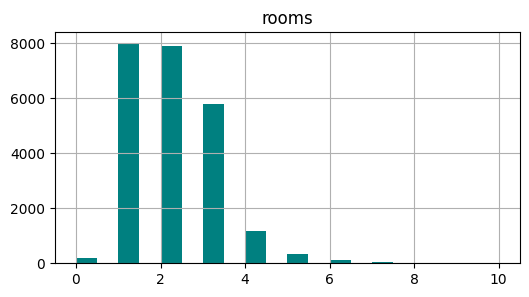

In [65]:
# Строим гистограмму по количеству комнат
estate.hist('rooms', color='teal', range=(0, 10), bins=20, figsize = (6, 3))
plt.show()

На гистограмме прослеживается распределение Пуассона, наиболее востребованы однокомнатные и двухкомнатные квартиры, чуть меньше продано трехкомнатных квартир. Объекты недвижимости с большим количеством комнат продавались значительно реже.

Выведем статистические данные по высоте потолка и построим гистограмму столбца `ceiling_height`.

In [66]:
# Статистические показатели высоты потолка
estate['ceiling_height'].describe()

count   23552.00
mean        2.70
std         0.21
min         2.50
25%         2.60
50%         2.65
75%         2.70
max         5.00
Name: ceiling_height, dtype: float64

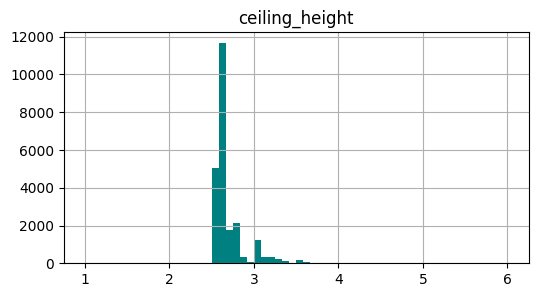

In [67]:
# Строим гистограмму по высоте потолка
estate.hist('ceiling_height', color='teal', range=(1, 6), bins=60, figsize = (6, 3))
plt.show()

Средний показатель высоты потолка 2.7 м. На диаграмме значения имеют распределение Пуассона, больше всего продано квартир с высотой равной среднему показателю. Нижняя граница значений соответсвут норме в 2.5 м. 

Выведем статистические характеристики по значениям этажа объектов и построим гистограмму столбца `floor`.

In [68]:
# Статистические показатели этажа квартиры
estate['floor'].describe()

count   23552.00
mean        5.88
std         4.87
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64

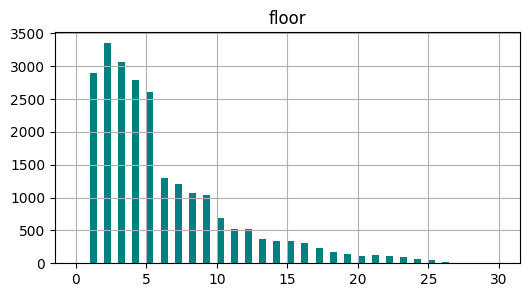

In [69]:
# Строим гистограмму по этажу объекта
estate.hist('floor', color='teal', range=(0, 30), bins=60, figsize = (6, 3))
plt.show()

Из гистограммы можно сделать вывод, что продается много объектов с 1-го по 5-й этаж, и вторая ступень распределения значений приходится на квартиры с 6-го по 9-й этаж. Объекты, расположенные выше 10-го этажа продовались значительно реже.

Также рассмотрим распределение значений по типу этажа объекта недвижимости и выведем гистограмму для них.

In [70]:
# Статистические показатели типа этажа квартиры
estate['type_floor'].describe()

count      23552
unique         3
top       другой
freq       17321
Name: type_floor, dtype: object

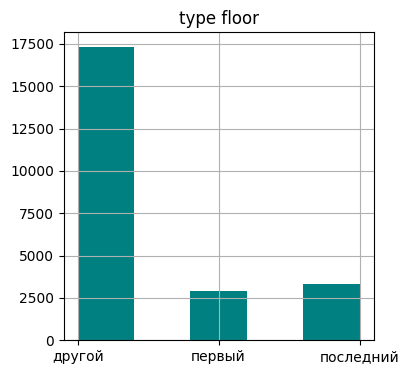

In [71]:
# Строим гистограмму по типу этажу объекта
estate['type_floor'].hist(bins=5, color='teal', grid=True, figsize=(4,4))
plt.title('type floor')
plt.show()

Квартиры на первом и последнем этажах считаются не очень комфортными для проживания и никогда особо не пользовались спросом, поэтому распределение значений на гистограмме вполне ожидаемо. Большинство объектов продано с типом этажа «другой».

Теперь построим гистограмму по общему количеству этажей в доме и узнаем их статистические показатели.

In [72]:
# Статистические показатели общего количества этажей в доме 
estate['floors_total'].describe()

count   23552.00
mean       10.68
std         6.59
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

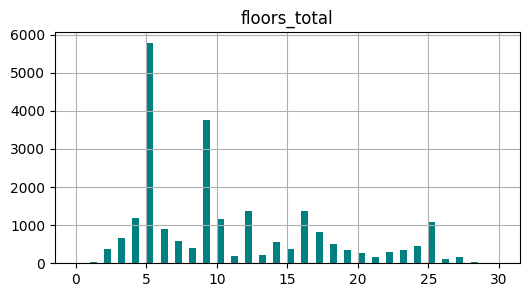

In [73]:
# Строим гистограмму по общему количеству этажей в доме 
estate.hist('floors_total', color='teal', range=(0, 30), bins=60, figsize = (6, 3))
plt.show()

Медиана данного параметра равна 9. Также видим, что распределение количества этажей в доме соответствует распределению Пуассона, пиковые значения приходятся на пятиэтажные и девятиэтажные дома.

Следующим параметром исследования будет расстояние до центра города в метрах. Выведем статистические характеристики и отразим гистограмму столбца `center_nearest`.

In [74]:
# Статистические показатели расстояние до центра города
estate['center_nearest'].describe()

count   23552.00
mean    13938.28
std      7568.65
min       181.00
25%     10936.50
50%     13073.00
75%     15247.00
max     65968.00
Name: center_nearest, dtype: float64

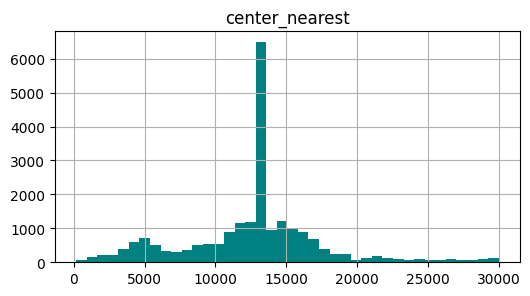

In [75]:
# Строим гистограмму по расстоянию до центра города
estate.hist('center_nearest', color='teal', range=(150, 30000), bins=40, figsize = (6, 3))
plt.show()

Средний показатель расстояния до центра города почти 14 км. На гистограмме есть небольшой пик для расстояния около 5 км и большой в диапазоне среднего показателя. Вероятно, в Санкт-Петербурге разная плотность жилой застройки.

Далее рассмотрим распределение значений в столбце с расстоянием до ближайшего аэропорта и построим гистограмму по данному параметру.

In [76]:
# Статистические показатели расстояния до ближайшего аэропорта
estate['airports_nearest'].describe()

count   23552.00
mean    28323.41
std     11090.91
min      6450.00
25%     21153.50
50%     26763.00
75%     34324.00
max     84869.00
Name: airports_nearest, dtype: float64

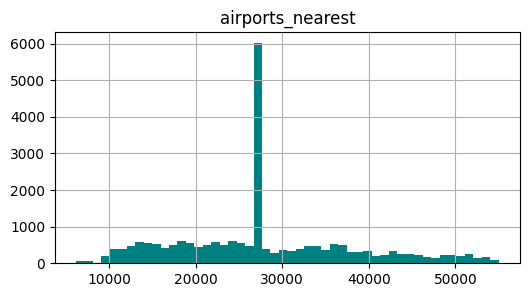

In [77]:
# Строим гистограмму по расстоянию до до ближайшего аэропорта
estate.hist('airports_nearest', color='teal', range=(6200, 55000), bins=50, figsize = (6, 3))
plt.show()

Основная часть проданных объектов расположена в диапозоне от 10 до 40 км. Среднее расстояние до ближайшего аэропорта около 28 км, пик в диапозоне среднего значения отражен и на гистограмме.

Выведем статистические данные по расстоянию до ближайшего парка и построим гистограмму столбца `parks_nearest`.

In [78]:
# Статистические показатели расстояния до ближайшего парка
estate['parks_nearest'].describe()

count   8027.00
mean     490.60
std      341.63
min        1.00
25%      288.00
50%      455.00
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64

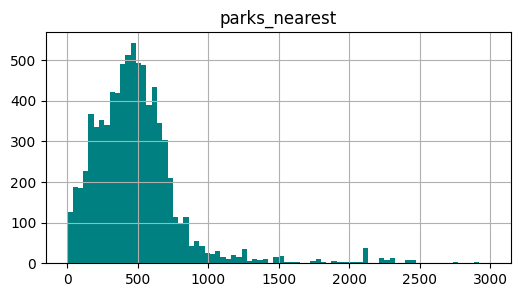

In [79]:
# Строим гистограмму по расстоянию до до ближайшего аэропорта
estate.hist('parks_nearest', color='teal', range=(0, 3000), bins=80, figsize = (6, 3))
plt.show()

Наблюдаем нормальное распределение на гистограмме, большинство объектов находятся на расстоянии менее 700 м от парка. Чаще всего встречается среднее значение и близкие к нему. Средний показатель - примерно 491 м.

Следующим параметром исследования будет день публикации объявления. Выведем статистические характеристики и отразим гистограмму столбца `weekday_exposition`.

In [80]:
# Статистические показатели дня публикации объявления
estate['weekday_exposition'].describe()

count   23552.00
mean        2.57
std         1.79
min         0.00
25%         1.00
50%         3.00
75%         4.00
max         6.00
Name: weekday_exposition, dtype: float64

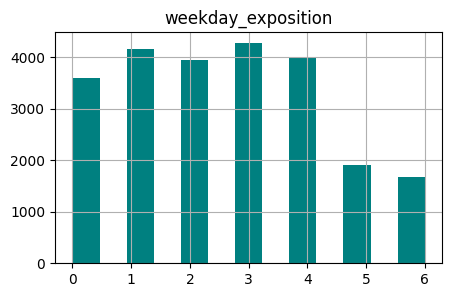

In [81]:
# Строим гистограмму по дню публикации объявления
estate.hist('weekday_exposition', color='teal', range=(0, 6), bins=13, figsize = (5, 3))
plt.show()

Согласно распределению значений большинство объявлений опубликованы в будни, в выходные дни наблюдается спад.

Далее посмотрим статистические показатели месяца публикации объявления и построим гистограмму столбца `month_exposition`.

In [82]:
# Статистические показатели месяца публикации объявления
estate['month_exposition'].describe()

count   23552.00
mean        6.40
std         3.49
min         1.00
25%         3.00
50%         6.00
75%        10.00
max        12.00
Name: month_exposition, dtype: float64

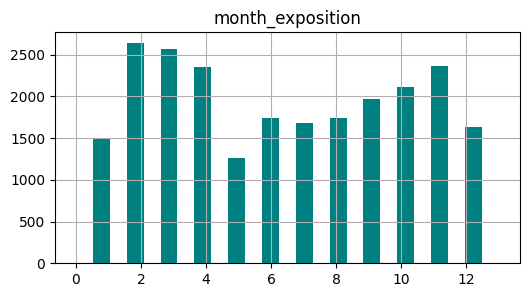

In [83]:
# Строим гистограмму по месяцу публикации объявления
estate.hist('month_exposition', color='teal', range=(0, 13), bins=25, figsize = (6, 3))
plt.show()

На гистограмме наблюдаем несколько пиков распределения значений, больше объявлений опубликовано с февраля по апрель, также активность возобновляется в октябре и ноябре. Меньшая часть публикаций приходится на май и январь, вероятно, это связано с большим количеством праздничных выходных дней.

Изучим, как быстро продавались квартиры. Для этого выведем статистические характеристики и отразим гистограмму столбца `days_exposition`, в котором хранятся значения количества дней размещенных объявлений (от публикации до снятия).

In [84]:
# Статистические показатели количества дней размещенных объявлений
estate['days_exposition'].describe()

count   20381.00
mean      180.78
std       219.73
min         1.00
25%        45.00
50%        95.00
75%       231.00
max      1580.00
Name: days_exposition, dtype: float64

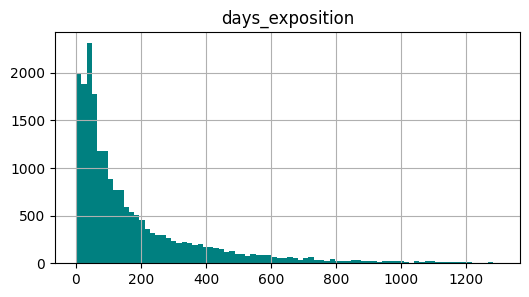

In [85]:
# Строим гистограмму по количеству дней размещенных объявлений
estate.hist('days_exposition', color='teal', range=(0, 1300), bins=80, figsize = (6, 3))
plt.show()

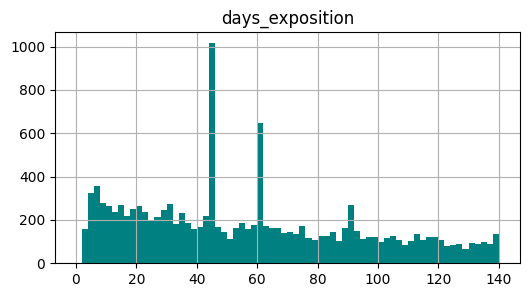

In [86]:
# Рассмотрим пиковые значения количества дней размещенных объявлений
estate.hist('days_exposition', color='teal', range=(0, 140), bins=70, figsize = (6, 3))
plt.show()

На гистограмме наблюдаем, что распределение значений соответсвует распределению Пуассона. Болшая часть квартир продана в первые 3 месяца, пиковые значения приходятся на объявления со сроком публикации от 45 до 60 дней, значительно хуже продавались объекты со сроком публикации более 500 дней. Среднее время продажи 181 день, а медианное почти вдвое меньше - 95 дней. Такое отличие показателей связано с наличием многолетних продаж недвижимости.

Таким образом, исходя из статистических показателей, обычно продажа занимает от 1,5 до 7,5 месяцев, значительная часть квартир продается в срок до 100 дней. К быстрым продажам можно отнести объявления со сроком публикации до 45 дней, а к не обычно долгим - со сроком публикации более 230 дней(примерно более 8 месяцев).

Выясним, какие факторы больше всего влияют на общую стоимость объекта. Для начала проверим, зависит ли полная стоимость от общей площади квартиры. Чтобы посмотреть на взаимосвязь между между ними, построим диаграмму рассеяния.

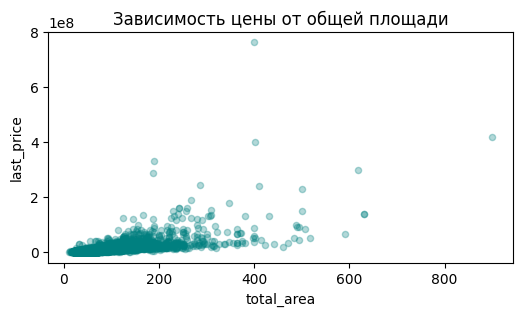

In [87]:
# диаграмма рассеяния, отражающая зависимость полной цены от общей площади
estate.plot(x='total_area', y='last_price', kind='scatter', color='teal', alpha=0.3, title='Зависимость цены от общей площади',\
figsize = (6, 3))
plt.show()

На диаграмме прослеживается положительная корреляция, построим также диаграмму рассеяния для выявления взаимосвязи между медианой полной стоимости и общей площади объекта, а также рассчитаем коэффициент Пирсона.

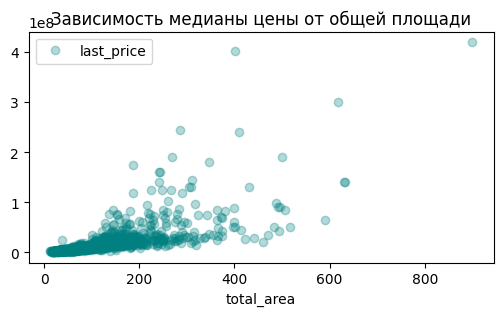

In [88]:
# диаграмма рассеяния, отражающая зависимость медианы полной цены от общей площади
estate.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(style='o', alpha=0.3, color='teal', \
title='Зависимость медианы цены от общей площади', figsize=(6,3))
plt.show()

In [89]:
# рассчитаем коэффициент корреляции и окурглим до 2 знаков
round(estate['last_price'].corr(estate['total_area']), 2)

0.65

Получили коэффициент Пирсона 0.65, такой показатель подтверждает наличие взаимосвязи между общей площадью и полной стоимостью объекта. На диаграмме рассеяния также видно корреляцию, с увеличением общей площади растет и стоимость, особенно для объектов общей площадью до 200 м², далее связь менее плотная.

Далее определим, зависит ли полная стоимость от жилой площади квартиры. Также рассчитаем коэффициент корреляции и построим график.

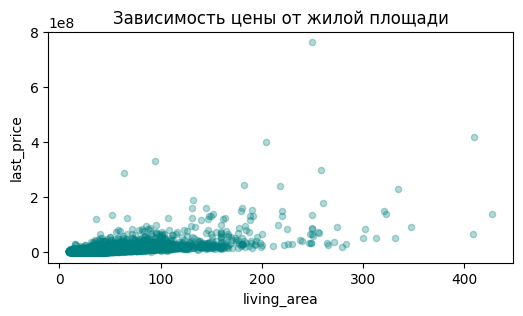

In [90]:
# диаграмма рассеяния, отражающая зависимость полной цены от жилой площади
estate.plot(x='living_area', y='last_price', kind='scatter', color='teal', alpha=0.3, title='Зависимость цены от жилой площади',\
figsize = (6, 3))
plt.show()

In [91]:
# рассчитаем коэффициент корреляции и окурглим до 2 знаков
round(estate['last_price'].corr(estate['living_area']), 2)

0.59

Коэффициент корреляции чуть ниже, но взаимосвязь также прослеживается. С увеличением жилой площади немного увеличивается полная стоимость квартиры, для объектов с жилой площадью более 150 м² взаимосвязь менее плотная.

Рассмотрим наличие взаимосвязи между полной стоимостью объекта и площадью кухни. Для этого построим диаграмму рассеяния и рассчитаем коэффициент Пирсона.

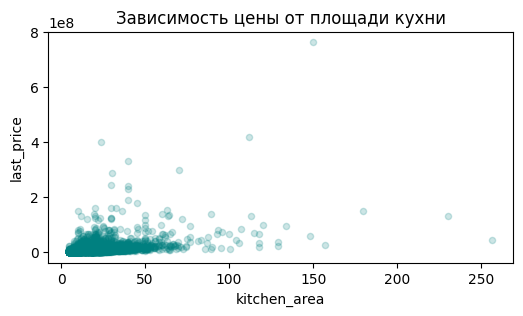

In [92]:
# диаграмма рассеяния, отражающая зависимость полной цены от жилой площади
estate.plot(x='kitchen_area', y='last_price', kind='scatter', color='teal', alpha=0.2,title='Зависимость цены от площади кухни',\
figsize = (6, 3))
plt.show()

In [93]:
# рассчитаем коэффициент корреляции и окурглим до 2 знаков
round(estate['last_price'].corr(estate['kitchen_area']), 2)

0.45

Уже по диаграмме видно, что взаимосвязь меньше, чем у предыдущих  параметров. Коэффициент корреляции в 0.45 говорит о наличии связи, однако не слишком сильной. 

Далее рассмотрим наличие зависимости полной стоимости от количества комнат. Также рассчитаем коэффициент Пирсона и построим диаграмму рассеяния.

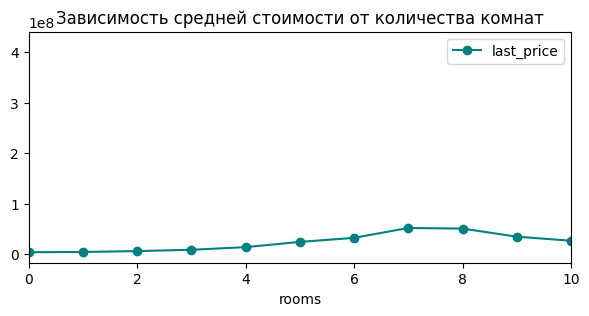

In [94]:
# диаграмма рассеяния, отражающая зависимость средней стоимости от количества комнат
estate.pivot_table(index='rooms', values='last_price').plot(style='o-', color='teal', xlim=(0, 10), figsize=(7,3),\
title='Зависимость средней стоимости от количества комнат')
plt.show()

In [95]:
# рассчитаем коэффициент корреляции и окурглим до 2 знаков
round(estate['last_price'].corr(estate['rooms']), 2)

0.36

Коэффициент Пирсона в 0.36 подтверждает очень слабую взаимосвязь между полной стоимостью квартиры и количеством комнат, все-таки цена больше зависит от других параметров. Комнаты бывают разной площади, поэтому большую роль играет метраж комнаты, а не их количество.

Проверим, зависит ли полная стоимость от этажа, на котором расположена квартира. Чтобы визуализировать взаимосвязь между между ними, построим  график, отражающий зависимость медианы полной стоимости объекта от типа этажа, а также диаграмму рассеяния.

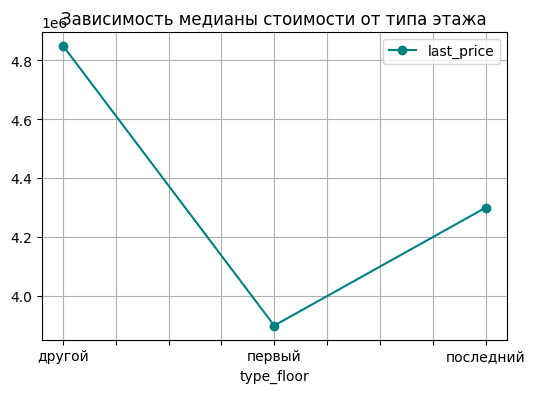

In [96]:
# график, отражающий зависимость медианы полной цены от типа этажа
estate.pivot_table(index='type_floor', values='last_price', aggfunc='median').plot(style='o-', alpha=1, \
color='teal', title='Зависимость медианы стоимости от типа этажа', figsize=(6,4), grid=True)
plt.show()

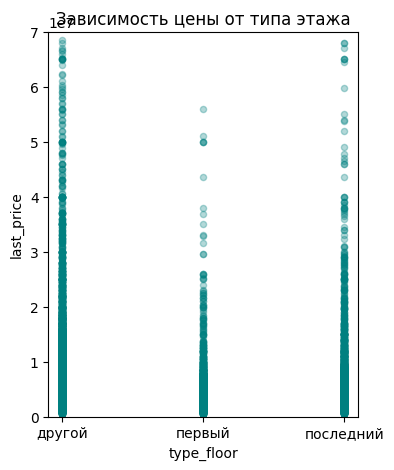

In [97]:
# диаграмма рассеяния, отражающая зависимость полной цены от типа этажа
estate.plot(x='type_floor', y='last_price', kind='scatter', color='teal', alpha=0.3, title='Зависимость цены от типа этажа',\
ylim=(0,70000000), figsize=(4,5))
plt.show()

Приходим к выводу, что тип этажа влияет на полную стоимость объекта недвижимости. Квартиры на последнем и первом этаже считаются менее комфортными для проживания и стоят дешевле других, причем, на первом этаже стоимость ниже.

Осталось выявить наличие или отсутствие взаимосвязи между датой публикации объявлений и полной стоимостью квартиры. Полагаю, корреляции не будет, чтобы убедиться в этом построим диаграммы рассеяния для среднего и медианного значений полной стоимости квартиры и значений в `weekday_exposition`.

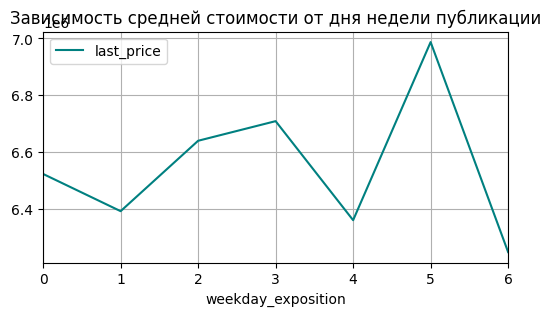

In [98]:
# диаграмма рассеяния, отражающая зависимость средней стоимости от дня недели публикации
estate.pivot_table(index='weekday_exposition', values='last_price').plot(style='-', xlim=(0,6),\
color='teal', figsize = (6, 3), title='Зависимость средней стоимости от дня недели публикации', grid=True)
plt.show()

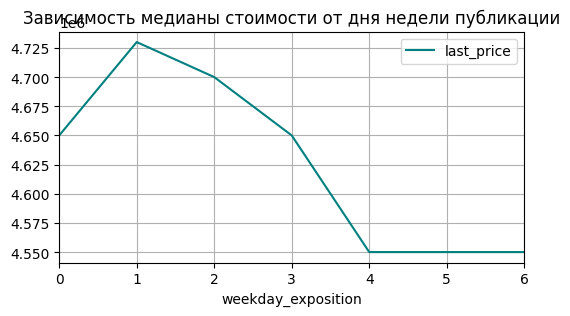

In [99]:
# диаграмма рассеяния, отражающая зависимость медианы стоимости от дня недели публикации
estate.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median').plot(style='-', xlim=(0,6),\
color='teal', figsize = (6, 3), title='Зависимость медианы стоимости от дня недели публикации', grid=True)
plt.show()

Диаграммы рассеяния для среднего и медианного значений полной стоимости квартиры и значений в `weekday_exposition` сильно отличаются. День размещения объявления практически не влияет на полную стоимость объекта, однако, объекты, размещенные в выходные дни имеют меньшую стоимость.

Проверим есть ли корреляция между месяцем публикации объявлений и полной стоимостью квартиры. Построим диаграммы рассеяния для среднего и медианного значений полной стоимости квартиры и значений в `month_exposition`.

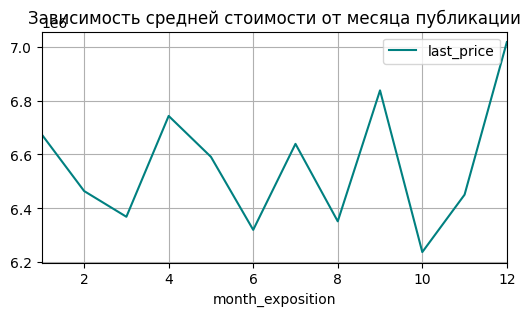

In [100]:
# диаграмма рассеяния, отражающая зависимость средней стоимости от месяца публикации
estate.pivot_table(index='month_exposition', values='last_price').plot(style='-', xlim=(1,12), color='teal', grid=True, \
figsize = (6, 3), title='Зависимость средней стоимости от месяца публикации')
plt.show()

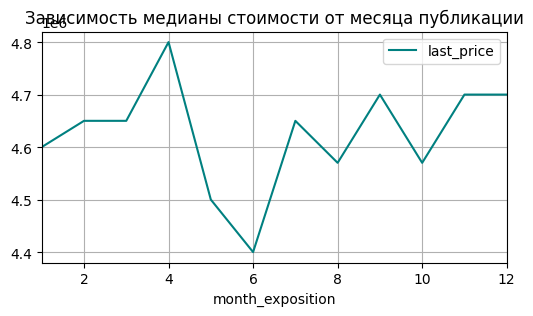

In [101]:
# диаграмма рассеяния, отражающая зависимость медианы стоимости от месяца публикации
estate.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot(style='-', xlim=(1,12),\
color='teal', figsize = (6, 3), title='Зависимость медианы стоимости от месяца публикации', grid=True)
plt.show()

In [102]:
# рассчитаем коэффициент корреляции и окурглим до 2 знаков
round(estate['last_price'].corr(estate['month_exposition']), 2)

0.0

Нулевой коэффициент Пирсона отражает, что полная стоимость объектов не зависит от месяца публикации объявлений. На графиках же прослеживается тенденция увеличения стоимости в апреле, сентябре и с ноября по декабрь, а снижение стоимости в июне.

Осталось определить наличие или отсутствие взаимосвязи между годом публикации объявлений и полной стоимостью квартиры. Построим диаграммы рассеяния для среднего и медианного значений полной стоимости квартиры и значений в `year_exposition` и рассчитаем коэффициент корреляции.

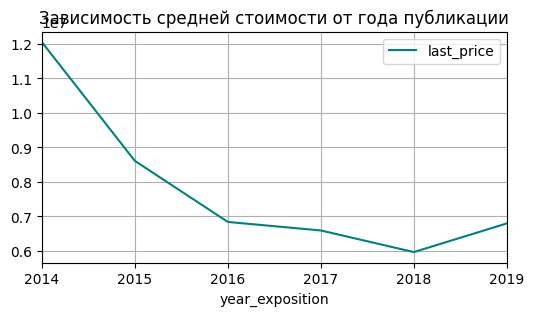

In [103]:
# диаграмма рассеяния, отражающая зависимость средней стоимости от года публикации
estate.pivot_table(index='year_exposition', values='last_price').plot(style='-', xlim=(2014,2019), color='teal', grid=True, \
figsize = (6, 3), title='Зависимость средней стоимости от года публикации')
plt.show()

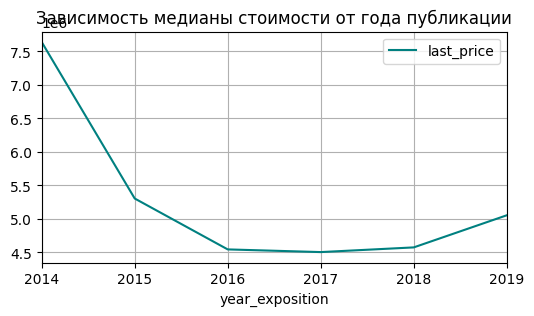

In [104]:
# диаграмма рассеяния, отражающая зависимость медианы стоимости от года публикации
estate.pivot_table(index='year_exposition', values='last_price', aggfunc='median').plot(style='-', xlim=(2014,2019),\
color='teal', figsize = (6, 3), title='Зависимость медианы стоимости от года публикации', grid=True)
plt.show()

In [105]:
# рассчитаем коэффициент корреляции и окурглим до 2 знаков
round(estate['last_price'].corr(estate['year_exposition']), 2)

-0.04

Коэффициент корреляции говорит об отсутствии влияния года публикации на общую стоимость объекта. Диаграммы рассеяния для среднего и медианного значений полной стоимости квартиры и значений в `year_exposition` схожи. Прослеживается общий тренд снижения стоимости квартир в период экономического кризиса с 2014 по 2018 годы и незначительное увеличение стоимости в 2019 году.

Найдем из общей выборки 10 населённых пунктов с наибольшим числом объявлений и выделим из них такие, где самая высокая и низкая стоимость квадратного метра. Для этого рассчитаем среднюю цену одного квадратного метра для каждого населённого пункта из первой десятки по числу публикаций и сравним полученные показатели.

In [106]:
# Группируем данные по названию населенного пункта и выбираем из них 10 с наибольшим количеством публикаций
# Рассчитаем для каждого населенного пункта из топ-10 среднюю цену за 1 м² 
estate.groupby('locality_name').agg({'balcony':'count', 'meter_price':'median'}) \
    .reset_index()\
    .sort_values(by = 'balcony', ascending = False) \
    .rename(columns={'balcony':'count'})\
    .head(10)

,locality_name,count,meter_price
33,Санкт-Петербург,15643,104761.00
219,поселок Мурино,550,85878.00
295,поселок Шушары,439,76829.00
3,Всеволожск,398,65789.00
32,Пушкин,369,100000.00
13,Колпино,338,74723.50
230,поселок Парголово,327,91642.00
6,Гатчина,307,67796.00
79,деревня Кудрово,299,91860.00
4,Выборг,237,58158.00


Очевидно, что наибольшее количество объектов находится в Санкт-Петербурге, на втором и третьем местах поселки Мурино и Шушары, замыкают топ-10 Гатчина, деревня Кудрово и город Выборг.

Таким образом, лидер и отстающий населенный пункт из топ-10 по количиству публикаций не сдали позиции, самая высокая стоимость квадратного метра в Санкт-Петербурге, а наименьшая цена за 1 м² в Выборге.

Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра.

In [107]:
# Рассчитаем среднюю цену для каждого км и отсортируем значения в убывающем порядке
spb_km_price = estate.query('locality_name == "Санкт-Петербург"').pivot_table(index='center_nearest_km', values='last_price', 
aggfunc='median')
spb_km_price.sort_values(by='last_price', ascending=False)

,last_price
center_nearest_km,
0,17900000
1,11395000
2,10000000
5,9490000
4,9200000
6,8900000
3,8418000
27,8300000
7,7800000


Визуализируем с помощью графиков рассчитанyую среднюю стоимость каждого километра и оценим зависимость стоимости объекта от расстояния до центра города.

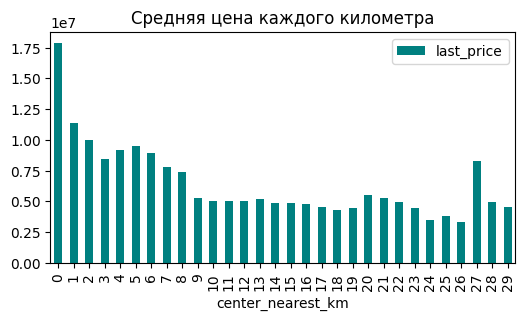

In [108]:
# график, отражающий среднюю стоимость каждого километра
spb_km_price.plot(kind='bar', color='teal', title='Средняя цена каждого километра', figsize = (6, 3))
plt.show()

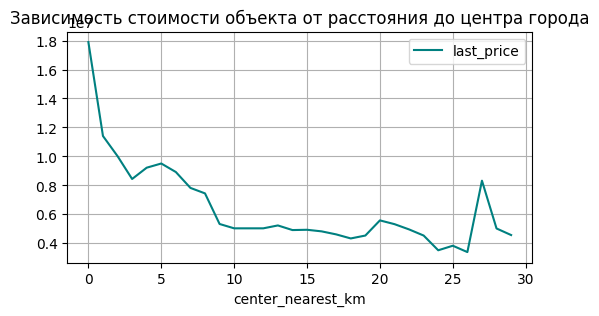

In [109]:
# график, отражающий зависимость стоимости объекта от расстояния до центра города
spb_km_price.plot(style='-', color='teal', title='Зависимость стоимости объекта от расстояния до центра города',\
figsize = (6, 3), grid=True)
plt.show()

Неудивительно что, наблюдается отрицательная корреляция стоимости квартиры и расстояния до центра города. Максимальная стоимость у квартир на расстоянии до 2 км от центра. Общий тренд такой, что с увеличением расстояния от центра города стоимость объекта недвижимости снижается. Видим пик повышения стоимости на расстоянии 27 км, вероятно, это элитный район.

**Вывод**

Таким образом, на этапе исследовательского анализа данных изучили следующие параметры объектов: общая площадь; жилая площадь;
площадь кухни; цена объекта; количество комнат; высота потолков; этаж квартиры; тип этажа квартиры («первый», «последний», «другой»); общее количество этажей в доме; расстояние до центра города в метрах; расстояние до ближайшего аэропорта; расстояние до ближайшего парка; день и месяц публикации объявления. Построили отдельные гистограммы для каждого из этих параметров и отметили все наблюдения по параметрам .

Выяснили, как быстро продавались квартиры. Построили гистограмму по количеству дней публикации объявления, посчитали среднее и медиану. Указали, сколько времени обычно занимает продажа, какие продажи можно считать быстрыми, а какие — необычно долгими.
 
Определили, какие факторы больше всего влияют на общую стоимость объекта. Для этого изучили, зависит ли цена от: общей площади;
жилой площади; площади кухни; количества комнат; этажа, на котором расположена квартира (первый, последний, другой) и даты размещения (день недели, месяц, год). Построили графики, которые отражают зависимость цены от указанных выше параметров.

Заключительным шагом посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделили населённые пункты с самой высокой и низкой стоимостью квадратного метра. А также выделили квартиры в Санкт-Петербурге, вычислили среднюю цену каждого километра и оценили, как стоимость объектов зависит от расстояния до центра города.

### Общий вывод

Проводя исследовательскую работу по объявлениям о продаже квартир изучили и подготовили данные к анализу. Были выявлены и заполнены пропущенные значения, изменен тип данных, найдены и обработаны неявные дубликаты и аномальные значения, а также проведена категоризация исходных данных. Произвели необходимые расчеты для проведения полноценного анализа данных. Для визуальной интерпретации корреляции ценообразования квартир с рядом показателей, таких как: общая площадь, жилая площадь; площадь кухни; количество комнат; этаж, на котором расположена квартира (первый, последний, другой); дата размещения (день недели, месяц, год); расстояние до центра города, использовала сводные таблицы, графики и диаграммы рассеяния, на основании которых оценили наличие, либо отсутствие взаимосвязи по каждому показателю.

В процессе исследования архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет пришли к следующим выводам:

 - **срок продажи объекта**
 
Обычно продажа занимает от 1,5 до 7,5 месяцев, значительная часть квартир продается в срок до 100 дней. К быстрым продажам можно отнести объявления со сроком публикации до 45 дней, а к необычно долгим - со сроком публикации более 7,5 месяцев.

 - **факторы, влияющие на общую стоимость квартиры**
 
Наибольшая взаимосвязь выявлена между общей площадью и полной стоимостью объекта недвижимости, также полная стоимость зависит от жилой площади и площади кухни. Неудивительно, что с увеличением площади повышается стоимость квартир.

Тип этажа также влияет на полную стоимость. Квартиры на последнем и первом этаже стоят дешевле чем на других, причем, на первом этаже стоимость ниже.

Наблюдается совсем незначительная корреляция с количеством комнат, все-таки комнаты бывают разной площади, поэтому большую роль играет метраж комнаты, а не их количество.

 - **стоимость 1 м² в топ-10 населённых пунктов с наибольшим числом объявлений**
 
Так совпало, что лидирующая и отстающая позиции по стоимости 1 м² остались у тех же населенных пунктов, что и в рейтинге по количеству публикаций. Очевидно, что в Санкт-Петербурге максимальная стоимость, немного ниже в Пушкине, деревне Кудрово и поселке Парголово. Дешевле всего в Выборге и Всеволожске. Разница в стоимости 1 м² крайних позиций составлят порядка 46,5 тысяч рублей.
 
- **зависимость стоимости объекта от расстояния до центра города** 

Выявили вполне очевидную отрицательную корреляцию стоимости квартиры и расстояния до центра города. Максимальная стоимость у квартир в радиусе до 2 км от центра Санк-Петербурга. Общий тренд такой, что с удалением от центра города стоимость объекта недвижимости снижается. Правда имеется небольшой рост полной стоимости квартир в 5-ти и 20-ти км от центра, а также пик повышения стоимости на расстоянии 27 км, вероятно, это в данных районах представлена элитная недвижимость.

Резюмируя результаты проведенного исследовательского анализа, полагаем, что установленные параметры позволят построить автоматизированную систему, отслеживающую аномалии и мошенническую деятельность.

**Чек-лист готовности проекта**

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод